In [49]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Descriptive Statistics
Table Of Contents :
1. Measures of Central Tendency : Mean, Median, Mode
2. Measures of Spread : Range,Variance, Standard Deviation, Quantiles, Quartiles, Inter Quartile Range

## Measures of Central Tendency

1. Mean. Mean is another words of an average of something (values) in this case we call it data. In statistics, the calculation of mean is same whether it is a sample or population. The following is the equation for calculation mean of data :
- for mean of sample :
$$ \large \bar{X}  = \frac{\sum_{i=1}^{n} x_i}{n}$$
- for mean of population :
$$ \large \mu  = \frac{\sum_{i=1}^{N} x_i}{N}$$

2. Median. Median is a midpoint of a sorted data.

3. Mode. Mode is a data point that is the most frequent than the others.

Note :
the median is preferable to use when the data has outliers because mean is sensitive to outliers. For better understanding, we will visualize it at the end of topics.

## Measures of spread

1. Range. Range is a different between the largest and the smallest data point.
$$ Range = (X_{largest} - X_{smallest})$$

2. Variance. Variance is a measurement how vary and how big a spread of data is, but variance is little bit hard to interpret since the unit is diffrence from the actual data.
- for sample :
$$ \large{S}^2  = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}$$
- for population :
$$ \large{\sigma}^2  = \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}$$

3. Standard Deviation. Same as the variance to tell how vary and how big a spread of data is , but standard deviation is the square root of variance and it is easy to interpret since the unit is same as the actual data.
- for sample :
$$ \large{S}  = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}$$
- for population :
$$ \large{\sigma}  = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}}$$

4. Quantiles. Quantiles are data points that devide data into equal-sized area (group) or devide probablity density function into equal-sized area. There many special quantiles, eg : Quartile (divide data into 4 equal-sized group), Quintile (divide data into 5 equal-sized), Percentile (divide data into 100 equal-sized).

5. Quartiles. Quartiles are one of special quantiles that divide data into 4 equal-sized group. the values of quartiles are (0.25,0.5,0.75).

6. Inter Quantile Range (IQR). IQR is the difference between quntile 0.75 and quantile 0.25.

$$ \large{IQR}  = q_{0.75} - q_{0.25}$$

## Visualization

In [9]:
data = pd.read_csv('titanic.csv')
display(data.head())

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Mean of the Data is 29.471
Median of the Data is 28.0
Mode of the Data is 22.0
-------------------------
Visualization :


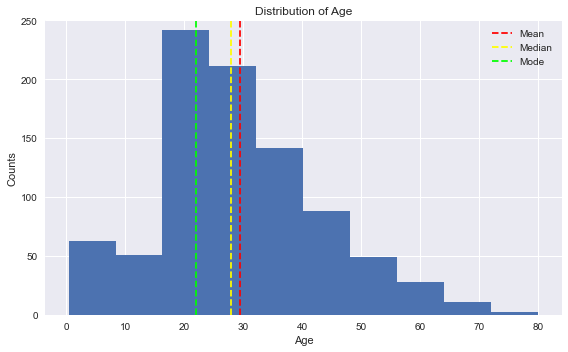

In [22]:
# For this example, we will use Age column to calculate mean, median, and mode
mean  = data['Age'].mean()
median = data['Age'].median()
mode = data['Age'].mode()

print(f'Mean of the Data is {mean :.3f}')
print(f'Median of the Data is {median}')
print(f'Mode of the Data is {mode.values[0]}')
print('-'*25)
print('Visualization :')

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(data['Age'])
ax.set_title('Distribution of Age')
ax.set_ylabel('Counts')
ax.set_xlabel('Age')
ax.set_ylim(0,250)
ax.vlines(mean,0,250, colors = 'red', label = 'Mean', linestyle = 'dashed')
ax.vlines(median,0,250, colors = 'yellow', label = 'Median', linestyle = 'dashed')
ax.vlines(mode,0,250, colors = 'lime', label = 'Mode', linestyle = 'dashed')
ax.legend()
plt.tight_layout()
plt.show()

from the plot above, we can see the distribution of age has a heavy tail to the right this means the data is positive skewed where mode < median < mean. Other case is the data is negative skewed where mean < median < mode. for an extreme skewness where there is an extreme outlier in the data , median is more preferable to use for decribing the data since mean is sensitive to outliers.

In [47]:
# For this example, we will use Age column to calculate range, variance, standard deviation, quartile, IQR.

Range_ = max(data['Age']) - min(data['Age'])
Variance_pop = np.var(data['Age']) # for population
Variance_samp = np.var(data['Age'], ddof = 1) # for sample
std_pop = np.sqrt(Variance_pop)
std_samp = np.sqrt(Variance_samp)
quartiles_ = data['Age'].quantile([0.25,0.5,0.75])
IQR_ = stats.iqr(data['Age'])

print(f'Range : {Range_}')
print(f'Population Variance : {Variance_pop}')
print(f'Sample Variance : {Variance_samp}')
print(f'Population Standard Deviation : {std_pop}')
print(f'Sample Standard Deviation : {std_samp}')
print(f'Q1 : {quartiles_[0]}\nQ2 : {quartiles_[1]}\nQ3 : {quartiles_[2]}')
print(f'IQR : {IQR_}')

Range : 79.58
Population Variance : 199.20346240459386
Sample Variance : 199.428297012274
Population Standard Deviation : 14.113945671023176
Sample Standard Deviation : 14.121908405462555
Q1 : 20.25
Q2 : 28.0
Q3 : 38.0
IQR : 17.75


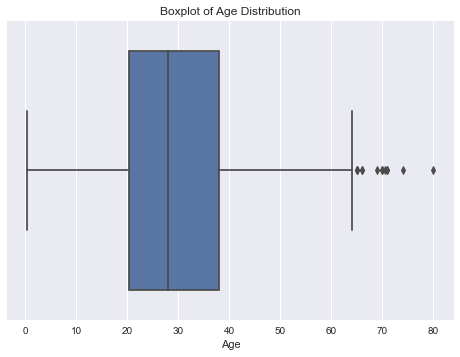

In [51]:
sns.boxplot(x = 'Age', data = data)
plt.title('Boxplot of Age Distribution')
plt.xlabel('Age')
plt.show()

From the boxplot above, the bottom line of the box is quantile 0.25, the middle line is quantile 0.5 (median), and the top line is quantile 0.75. The lenght of the bottom whisker derived from quantile 0.25 - 1.5 (*it may vary, eg : 1,2,2.5,etc) IQR and The lenght of the top whisker derived from quantile 0.75 + 1.5 (*it may vary, eg : 1,2,2.5,etc) IQR. If a data point lies outside the whisker threshold, it can be identified as  an outlier.